### Exploring and Transforming the Kaggle grid data

- We take only those time series that have more than 12 years of data. Of these, we take the last 12 years, getting a total of 12 series.

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
kepath = Path("/Users/caner/code/tensorseason/data/kaggle_energy/")
paths = list(e for e in kepath.iterdir() if "est" not in str(e))

In [82]:
HR_IN_YR

104832

In [79]:
good_dfs = []
objs = []
HR_IN_YR = 52 * 24 * 7 * 12  # 12 years

for path in paths:
    
    df = pd.read_csv(path, parse_dates=['Datetime'], index_col='Datetime')
    df.columns = ["target"]
    resampled = df.resample(rule="1H").sum()

    assert np.allclose(np.diff(resampled.index).astype(int) // 1e9, 3600)
    assert np.isnan(resampled['target']).sum() == 0
    
    if len(resampled) > HR_IN_YR:
        cut_df = resampled.iloc[-HR_IN_YR:].copy()
        
        good_dfs.append(cut_df)
        
        objs.append({
            "target": np.array(cut_df['target']).tolist(),
            "start": str(cut_df.index[0]),
            "freq": "1H",
            "id": str(path).split("/")[-1][:-4]
        })
    
        print(f"{len(df)}, {path}")

143206, /Users/caner/code/tensorseason/data/kaggle_energy/PJMW_hourly.csv
121275, /Users/caner/code/tensorseason/data/kaggle_energy/DAYTON_hourly.csv
145366, /Users/caner/code/tensorseason/data/kaggle_energy/PJME_hourly.csv
116189, /Users/caner/code/tensorseason/data/kaggle_energy/DOM_hourly.csv
119068, /Users/caner/code/tensorseason/data/kaggle_energy/DUQ_hourly.csv
121273, /Users/caner/code/tensorseason/data/kaggle_energy/AEP_hourly.csv


PJMW_hourly 2006-08-18 01:00:00 2018-08-03 00:00:00


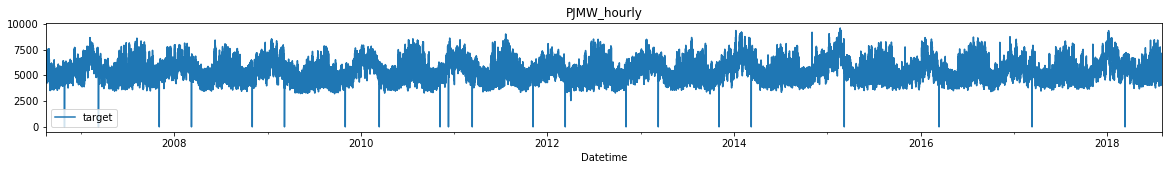

DAYTON_hourly 2006-08-18 01:00:00 2018-08-03 00:00:00


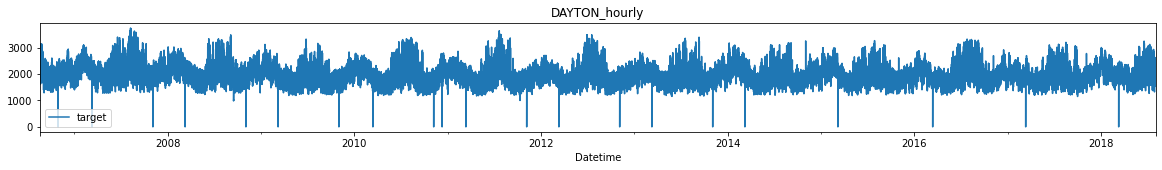

PJME_hourly 2006-08-18 01:00:00 2018-08-03 00:00:00


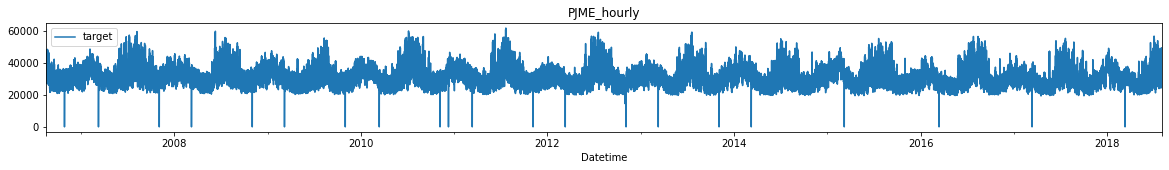

DOM_hourly 2006-08-18 01:00:00 2018-08-03 00:00:00


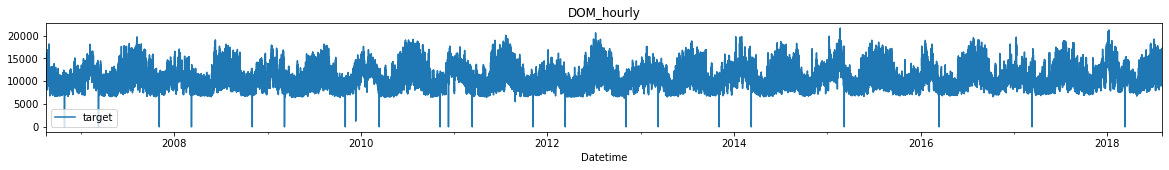

DUQ_hourly 2006-08-18 01:00:00 2018-08-03 00:00:00


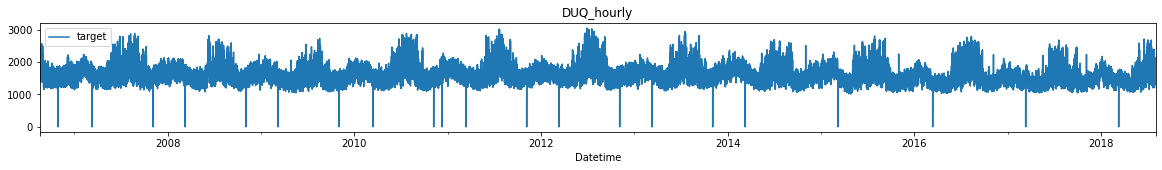

AEP_hourly 2006-08-18 01:00:00 2018-08-03 00:00:00


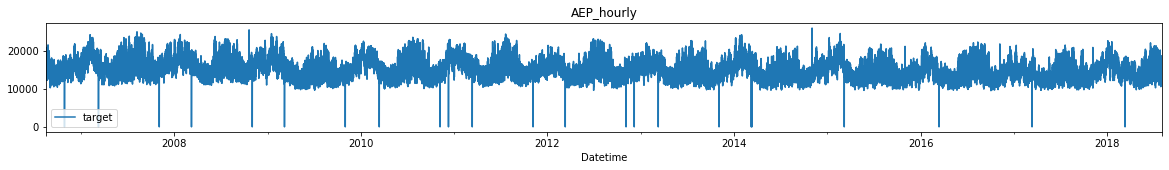

In [80]:
for o, df in zip(objs, good_dfs):
    f, ax = plt.subplots(figsize=(20, 2))
    ax.set(title=o['id'])
    df.plot(ax=ax)
    
    print(o['id'], df.index[0], df.index[-1])
    plt.show()

In [81]:
import json
out_path = Path("../datasets/kaggle_energy/")

for o in objs:
    with open(out_path / f"{o['id']}.json", "w") as fp:
        json.dump(o, fp)